In [1]:
import pandas as pd
from params import *
from data import *
import pickle
from models import *
import os
from torch import nn
from torch.optim import Adam
from train import Trainer
from eval import *
from metrics import *
from sklearn.manifold import TSNE
from encoding import *

d:\conda\envs\torch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pth = 'data/big_data/kinetics400_5per/train/'
pth_to_save_images = 'data/big_data/kinetics400_5per/devided/images/'
pth_to_save_audio = 'data/big_data/kinetics400_5per/devided/audios/'

In [3]:
import cv2
from pydub import AudioSegment
import os

c = 0

def extract_frame_and_audio(video_path, image_output_path, audio_output_path):
    """
    Извлекает первый кадр из видео и аудиодорожку, сохраняя их в указанные пути.
    Использует OpenCV для извлечения кадра и pydub для извлечения аудио.
    Убедитесь, что пути к изображению имеют правильное расширение (например, .jpg или .png).

    Args:
        video_path (str): Путь к исходному MP4 файлу.
        image_output_path (str): Путь для сохранения первого кадра (изображения). Должен заканчиваться на .jpg или .png.
        audio_output_path (str): Путь для сохранения аудиодорожки (WAV файл).
    """
    # Извлечение первого кадра с помощью OpenCV
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    if ret:
        # Убедимся, что путь к изображению имеет правильное расширение
        if not (image_output_path.lower().endswith('.jpg') or image_output_path.lower().endswith('.png')):
            raise ValueError("Путь к изображению должен заканчиваться на .jpg или .png")
        cv2.imwrite(image_output_path, frame)
    else:
        raise ValueError(f"Не удалось прочитать кадр из видео: {video_path}")
    cap.release()

    # Извлечение аудио с помощью pydub
    try:
        audio = AudioSegment.from_file(video_path, format="mp4")
        audio.export(audio_output_path, format="wav")
    except:
        c += 1

In [4]:
#### В файлах валялись файлы с расширением .part и .yadl(что-то такое), .webm и пара ломаных файлов, я вручную их удалил

In [5]:
# for class_name in tqdm(os.listdir(pth)):
#     os.mkdir(pth_to_save_images + class_name + '/')
#     os.mkdir(pth_to_save_audio + class_name + '/')
#     for video_name in os.listdir(pth + class_name + '/'):
#         extract_frame_and_audio(pth + class_name + '/' + video_name, pth_to_save_images + class_name + '/' + video_name.split('.')[0] + '.jpg', pth_to_save_audio + class_name + '/' + video_name.split('.')[0] + '.wav')

In [6]:
imgs = {
    OBJECT1_COLUMN_NAME: [],
    OBJECT2_COLUMN_NAME: []
}
for t in tqdm(os.listdir(pth_to_save_images)):
    for f in os.listdir(pth_to_save_images + t):
        imgs[OBJECT1_COLUMN_NAME].append(pth_to_save_images + t + '/' + f)
        imgs[OBJECT2_COLUMN_NAME].append(t)

100%|██████████| 400/400 [00:00<00:00, 14089.74it/s]


In [7]:
df_image = pd.DataFrame.from_dict(imgs)

In [8]:
df_image[TYPE1_COLUMN_NAME] = TYPE_IMAGE
df_image[TYPE2_COLUMN_NAME] = TYPE_TEXT

In [9]:
df_image.head()

,object1,object2,type1,type2
0,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text
1,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text
2,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text
3,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text
4,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text


In [10]:
audios = {
    OBJECT1_COLUMN_NAME: [],
    OBJECT2_COLUMN_NAME: []
}
for t in tqdm(os.listdir(pth_to_save_audio)):
    for f in os.listdir(pth_to_save_audio + t):
        audios[OBJECT1_COLUMN_NAME].append(pth_to_save_audio + t + '/' + f)
        audios[OBJECT2_COLUMN_NAME].append(t)

100%|██████████| 400/400 [00:00<00:00, 13514.32it/s]


In [11]:
df_audio = pd.DataFrame.from_dict(audios)

In [12]:
df_audio[TYPE1_COLUMN_NAME] = TYPE_AUDIO
df_audio[TYPE2_COLUMN_NAME] = TYPE_TEXT

In [13]:
df_audio.head()

,object1,object2,type1,type2
0,data/big_data/kinetics400_5per/devided/audios/...,abseiling,audio,text
1,data/big_data/kinetics400_5per/devided/audios/...,abseiling,audio,text
2,data/big_data/kinetics400_5per/devided/audios/...,abseiling,audio,text
3,data/big_data/kinetics400_5per/devided/audios/...,abseiling,audio,text
4,data/big_data/kinetics400_5per/devided/audios/...,abseiling,audio,text


In [14]:
df = pd.concat([df_image, df_audio], axis=0, ignore_index=True)

In [15]:
initial = InitialDataset(df)

In [16]:
# id_texts = initial.return_texts()
# id_image = initial.return_images()
# id_audio = initial.return_audios()

In [17]:
# txt_encoder = TextEncoder()
# encoded_text = txt_encoder.encode_dict(id_texts)

In [18]:
# with open('data\\big_data\\kinetics400_5per\\id_text.pickle', 'wb') as f:
#     pickle.dump(encoded_text, f)

In [19]:
# img_encoder = ImageEncoder()
# encoded_img = img_encoder.encode_from_paths(id_image)

In [20]:
# with open('data\\big_data\\kinetics400_5per\\id_img.pickle', 'wb') as f:
#     pickle.dump(encoded_img, f)

In [21]:
# audio_encoder = AudioEncoder()
# encoded_audio = audio_encoder.encode_from_paths(id_audio)

In [22]:
# with open('data\\big_data\\kinetics400_5per\\id_audio.pickle', 'wb') as f:
#     pickle.dump(encoded_audio, f)

In [23]:
with open('data\\big_data\\kinetics400_5per\\id_text.pickle', 'rb') as f:
    id_text = pickle.load(f)
with open('data\\big_data\\kinetics400_5per\\id_img.pickle', 'rb') as f:
    id_image = pickle.load(f)
with open('data\\big_data\\kinetics400_5per\\id_audio.pickle', 'rb') as f:
    id_audio = pickle.load(f)

In [24]:
orig_embs = id_image | id_text | id_audio

In [25]:
ds = ID_Dataset(initial.return_id_df(mode=TYPE_IMAGE), orig_embs) # Датасет pytorch для обучения
train_dataset, test_dataset = torch.utils.data.random_split(ds, [0.8, 0.2])
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True, num_workers=0, pin_memory=False)
model_images = ConverterModel(512, 768).to(DEVICE)
optim = Adam(model_images.parameters(), lr=0.01)
criterion = nn.MSELoss()

trainer = Trainer(
    model=model_images,
    dataset=ds,
    dl=train_dataloader,
    epochs=50,
    batch_size=TRAIN_BATCH_SIZE,
    optimizer=optim,
    criterion=criterion
)

model_images = trainer.train()

100%|██████████| 17/17 [00:00<00:00, 54.11it/s]


Epoch 1. Loss = 1.96625982198384e-05


100%|██████████| 17/17 [00:00<00:00, 123.34it/s]


Epoch 2. Loss = 1.2452201076484926e-05


100%|██████████| 17/17 [00:00<00:00, 125.97it/s]


Epoch 3. Loss = 1.1973459550063126e-05


100%|██████████| 17/17 [00:00<00:00, 126.74it/s]


Epoch 4. Loss = 1.1710516844232188e-05


100%|██████████| 17/17 [00:00<00:00, 104.44it/s]


--- Metric ---
Mean = 0.866642415523529
STD = 0.012530025094747543
median = 0.8684924244880676



100%|██████████| 17/17 [00:00<00:00, 106.55it/s]


Epoch 6. Loss = 1.1448051907336776e-05


100%|██████████| 17/17 [00:00<00:00, 111.60it/s]


Epoch 7. Loss = 1.134860792717518e-05


100%|██████████| 17/17 [00:00<00:00, 120.02it/s]


Epoch 8. Loss = 1.1241465870170941e-05


100%|██████████| 17/17 [00:00<00:00, 117.28it/s]


Epoch 9. Loss = 1.113973286237524e-05


100%|██████████| 17/17 [00:00<00:00, 55.51it/s] 


--- Metric ---
Mean = 0.8723273277282715
STD = 0.016994275152683258
median = 0.8717083930969238



100%|██████████| 17/17 [00:00<00:00, 127.31it/s]


Epoch 11. Loss = 1.0951301192108076e-05


100%|██████████| 17/17 [00:00<00:00, 115.03it/s]


Epoch 12. Loss = 1.0867052026242163e-05


100%|██████████| 17/17 [00:00<00:00, 129.02it/s]


Epoch 13. Loss = 1.0797248194194253e-05


100%|██████████| 17/17 [00:00<00:00, 129.41it/s]


Epoch 14. Loss = 1.0739484309851832e-05


100%|██████████| 17/17 [00:00<00:00, 108.88it/s]


--- Metric ---
Mean = 0.8765973448753357
STD = 0.019333185628056526
median = 0.8758276700973511



100%|██████████| 17/17 [00:00<00:00, 114.77it/s]


Epoch 16. Loss = 1.0568465881988232e-05


100%|██████████| 17/17 [00:00<00:00, 127.55it/s]


Epoch 17. Loss = 1.046734161036511e-05


100%|██████████| 17/17 [00:00<00:00, 126.72it/s]


Epoch 18. Loss = 1.035564491758123e-05


100%|██████████| 17/17 [00:00<00:00, 127.54it/s]


Epoch 19. Loss = 1.021565509518041e-05


100%|██████████| 17/17 [00:00<00:00, 107.29it/s]


--- Metric ---
Mean = 0.883204460144043
STD = 0.02418784610927105
median = 0.8815591335296631



100%|██████████| 17/17 [00:00<00:00, 131.35it/s]


Epoch 21. Loss = 1.0002155761412723e-05


100%|██████████| 17/17 [00:00<00:00, 119.62it/s]


Epoch 22. Loss = 9.852899211182375e-06


100%|██████████| 17/17 [00:00<00:00, 127.05it/s]


Epoch 23. Loss = 9.740395341850672e-06


100%|██████████| 17/17 [00:00<00:00, 128.31it/s]


Epoch 24. Loss = 9.594788650701958e-06


100%|██████████| 17/17 [00:00<00:00, 109.66it/s]


--- Metric ---
Mean = 0.8902300000190735
STD = 0.030487537384033203
median = 0.8886306881904602



100%|██████████| 17/17 [00:00<00:00, 120.18it/s]


Epoch 26. Loss = 9.370315865453449e-06


100%|██████████| 17/17 [00:00<00:00, 125.27it/s]


Epoch 27. Loss = 9.263736842513026e-06


100%|██████████| 17/17 [00:00<00:00, 128.53it/s]


Epoch 28. Loss = 9.110219991725899e-06


100%|██████████| 17/17 [00:00<00:00, 128.08it/s]


Epoch 29. Loss = 8.98097357548977e-06


100%|██████████| 17/17 [00:00<00:00, 106.43it/s]


--- Metric ---
Mean = 0.8970292210578918
STD = 0.032749321311712265
median = 0.896328330039978



100%|██████████| 17/17 [00:00<00:00, 122.88it/s]


Epoch 31. Loss = 8.700620412582794e-06


100%|██████████| 17/17 [00:00<00:00, 118.47it/s]


Epoch 32. Loss = 8.563596566091292e-06


100%|██████████| 17/17 [00:00<00:00, 128.33it/s]


Epoch 33. Loss = 8.439294106210582e-06


100%|██████████| 17/17 [00:00<00:00, 128.14it/s]


Epoch 34. Loss = 8.349392317086313e-06


100%|██████████| 17/17 [00:00<00:00, 108.20it/s]


--- Metric ---
Mean = 0.904629111289978
STD = 0.04311161860823631
median = 0.9047136306762695



100%|██████████| 17/17 [00:00<00:00, 113.70it/s]


Epoch 36. Loss = 8.155531560305462e-06


100%|██████████| 17/17 [00:00<00:00, 125.25it/s]


Epoch 37. Loss = 8.04208755766922e-06


100%|██████████| 17/17 [00:00<00:00, 128.47it/s]


Epoch 38. Loss = 8.007562911416244e-06


100%|██████████| 17/17 [00:00<00:00, 128.26it/s]


Epoch 39. Loss = 7.856877459744283e-06


100%|██████████| 17/17 [00:00<00:00, 108.92it/s]


--- Metric ---
Mean = 0.9095078706741333
STD = 0.062465619295835495
median = 0.9117095470428467



100%|██████████| 17/17 [00:00<00:00, 125.50it/s]


Epoch 41. Loss = 7.5982201224178425e-06


100%|██████████| 17/17 [00:00<00:00, 120.06it/s]


Epoch 42. Loss = 7.454678780050017e-06


100%|██████████| 17/17 [00:00<00:00, 129.07it/s]


Epoch 43. Loss = 8.039596792741577e-06


100%|██████████| 17/17 [00:00<00:00, 128.46it/s]


Epoch 44. Loss = 8.170783871719323e-06


100%|██████████| 17/17 [00:00<00:00, 107.90it/s]


--- Metric ---
Mean = 0.9118475914001465
STD = 0.04416988417506218
median = 0.9119531512260437



100%|██████████| 17/17 [00:00<00:00, 119.45it/s]


Epoch 46. Loss = 7.259804107206946e-06


100%|██████████| 17/17 [00:00<00:00, 124.82it/s]


Epoch 47. Loss = 7.004326192827648e-06


100%|██████████| 17/17 [00:00<00:00, 127.12it/s]


Epoch 48. Loss = 6.7888077524003165e-06


100%|██████████| 17/17 [00:00<00:00, 126.74it/s]


Epoch 49. Loss = 6.6276508903229114e-06


100%|██████████| 17/17 [00:00<00:00, 110.24it/s]


--- Metric ---
Mean = 0.9233049750328064
STD = 0.0660363957285881
median = 0.9271804094314575



In [26]:
test_dataloader = DataLoader(test_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=False, num_workers=0, pin_memory=False)
preds = []
for b in test_dataloader:
    _, emb_x, _, emb_y = b
    pred = encode_tensors(model_images, emb_x)
    for i in pred:
        preds.append(i)
    show_cosine_metric(pred, emb_y)

100%|██████████| 1/1 [00:00<00:00, 249.63it/s]


--- Metric ---
Mean = 0.8613571524620056
STD = 0.10148077458143234
median = 0.8623052835464478



100%|██████████| 1/1 [00:00<00:00, 166.37it/s]


--- Metric ---
Mean = 0.8562024831771851
STD = 0.11529514938592911
median = 0.8596076965332031



100%|██████████| 1/1 [00:00<00:00, 185.35it/s]


--- Metric ---
Mean = 0.8452993035316467
STD = 0.15149138867855072
median = 0.859442412853241



100%|██████████| 1/1 [00:00<00:00, 249.28it/s]


--- Metric ---
Mean = 0.847161054611206
STD = 0.14168627560138702
median = 0.8579179048538208



100%|██████████| 1/1 [00:00<00:00, 446.25it/s]

--- Metric ---
Mean = 0.8396009802818298
STD = 0.1512107253074646
median = 0.8493756055831909



d:\conda\envs\torch\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\conda\envs\torch\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\conda\envs\torch\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\conda\envs\torch\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\conda\envs\torch\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
            

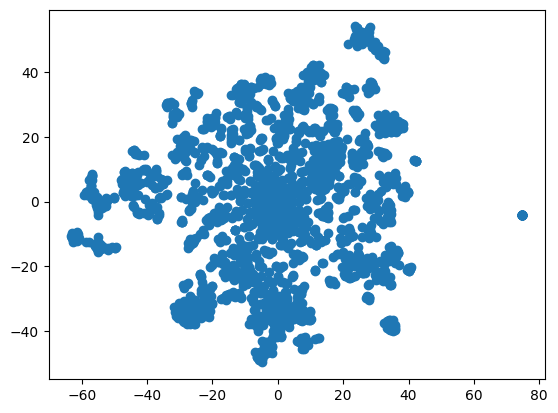

In [27]:
tsne = TSNE()
d = tsne.fit_transform(np.array(preds))
plt.scatter(d[:, 0], d[:, 1])
plt.show()

In [28]:
i_embs = ds.get_embs_from_ids(initial.return_ids_of_objects(TYPE_IMAGE))
i_res = encode_tensors(model_images, i_embs)
i_dict = {i: v for i, v in zip(initial.return_ids_of_objects(TYPE_IMAGE), i_res)}

  0%|          | 0/22 [00:00<?, ?it/s]

100%|██████████| 22/22 [00:00<00:00, 275.43it/s]


In [29]:
ds = ID_Dataset(initial.return_id_df(mode=TYPE_AUDIO), orig_embs)
train_dataset, test_dataset = torch.utils.data.random_split(ds, [0.8, 0.2])
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True, num_workers=0, pin_memory=False)
model_audio = ConverterModel(512, 768).to(DEVICE)
optim = Adam(model_audio.parameters(), lr=5e-4)
criterion = nn.MSELoss()

print('Starting trainining...')

trainer = Trainer(
    model=model_audio,
    dataset=ds,
    dl=train_dataloader,
    epochs=70,
    batch_size=TRAIN_BATCH_SIZE,
    optimizer=optim,
    criterion=criterion
)

model_audio = trainer.train()

Starting trainining...


100%|██████████| 17/17 [00:00<00:00, 77.58it/s]


Epoch 1. Loss = 2.804660397259795e-05


100%|██████████| 17/17 [00:00<00:00, 120.60it/s]


Epoch 2. Loss = 1.26898276562315e-05


100%|██████████| 17/17 [00:00<00:00, 121.91it/s]


Epoch 3. Loss = 1.1954885508203006e-05


100%|██████████| 17/17 [00:00<00:00, 120.76it/s]


Epoch 4. Loss = 1.1792774841978826e-05


100%|██████████| 17/17 [00:00<00:00, 49.60it/s]


--- Metric ---
Mean = 0.8641045689582825
STD = 0.012438750825822353
median = 0.8654220104217529



100%|██████████| 17/17 [00:00<00:00, 107.79it/s]


Epoch 6. Loss = 1.1723927514140087e-05


100%|██████████| 17/17 [00:00<00:00, 113.33it/s]


Epoch 7. Loss = 1.1693364740494872e-05


100%|██████████| 17/17 [00:00<00:00, 117.09it/s]


Epoch 8. Loss = 1.1667590285924234e-05


100%|██████████| 17/17 [00:00<00:00, 121.63it/s]


Epoch 9. Loss = 1.163962917871686e-05


100%|██████████| 17/17 [00:00<00:00, 106.42it/s]


--- Metric ---
Mean = 0.865672767162323
STD = 0.013705119490623474
median = 0.8662042617797852



100%|██████████| 17/17 [00:00<00:00, 118.66it/s]


Epoch 11. Loss = 1.1590042049647309e-05


100%|██████████| 17/17 [00:00<00:00, 110.15it/s]


Epoch 12. Loss = 1.1563452176233113e-05


100%|██████████| 17/17 [00:00<00:00, 129.86it/s]


Epoch 13. Loss = 1.1539308559349593e-05


100%|██████████| 17/17 [00:00<00:00, 129.31it/s]


Epoch 14. Loss = 1.1516279414536257e-05


100%|██████████| 17/17 [00:00<00:00, 101.81it/s]


--- Metric ---
Mean = 0.8671188950538635
STD = 0.015366671606898308
median = 0.8670375347137451



100%|██████████| 17/17 [00:00<00:00, 107.54it/s]


Epoch 16. Loss = 1.1465367094842804e-05


100%|██████████| 17/17 [00:00<00:00, 125.57it/s]


Epoch 17. Loss = 1.144503835348587e-05


100%|██████████| 17/17 [00:00<00:00, 125.56it/s]


Epoch 18. Loss = 1.1421325609717314e-05


100%|██████████| 17/17 [00:00<00:00, 126.55it/s]


Epoch 19. Loss = 1.1395427975458006e-05


100%|██████████| 17/17 [00:00<00:00, 103.68it/s]


--- Metric ---
Mean = 0.8685765862464905
STD = 0.016367297619581223
median = 0.8682423830032349



100%|██████████| 17/17 [00:00<00:00, 124.87it/s]


Epoch 21. Loss = 1.1339875186422432e-05


100%|██████████| 17/17 [00:00<00:00, 117.05it/s]


Epoch 22. Loss = 1.131271579879467e-05


100%|██████████| 17/17 [00:00<00:00, 125.01it/s]


Epoch 23. Loss = 1.1280554360837414e-05


100%|██████████| 17/17 [00:00<00:00, 121.96it/s]


Epoch 24. Loss = 1.1246771691730828e-05


100%|██████████| 17/17 [00:00<00:00, 93.18it/s] 


--- Metric ---
Mean = 0.8702859282493591
STD = 0.017367355525493622
median = 0.8699214458465576



100%|██████████| 17/17 [00:00<00:00, 109.74it/s]


Epoch 26. Loss = 1.118173850045423e-05


100%|██████████| 17/17 [00:00<00:00, 120.32it/s]


Epoch 27. Loss = 1.1144471500301734e-05


100%|██████████| 17/17 [00:00<00:00, 126.08it/s]


Epoch 28. Loss = 1.1100227766291937e-05


100%|██████████| 17/17 [00:00<00:00, 126.13it/s]


Epoch 29. Loss = 1.1061314523885812e-05


100%|██████████| 17/17 [00:00<00:00, 105.39it/s]


--- Metric ---
Mean = 0.8726792931556702
STD = 0.018204137682914734
median = 0.8718756437301636



100%|██████████| 17/17 [00:00<00:00, 121.63it/s]


Epoch 31. Loss = 1.0950772434625833e-05


100%|██████████| 17/17 [00:00<00:00, 114.19it/s]


Epoch 32. Loss = 1.089354805117182e-05


100%|██████████| 17/17 [00:00<00:00, 126.24it/s]


Epoch 33. Loss = 1.0830022461050248e-05


100%|██████████| 17/17 [00:00<00:00, 127.48it/s]


Epoch 34. Loss = 1.07664218944592e-05


100%|██████████| 17/17 [00:00<00:00, 107.53it/s]


--- Metric ---
Mean = 0.8762625455856323
STD = 0.019195271655917168
median = 0.8748451471328735



100%|██████████| 17/17 [00:00<00:00, 113.06it/s]


Epoch 36. Loss = 1.061903856225399e-05


100%|██████████| 17/17 [00:00<00:00, 125.57it/s]


Epoch 37. Loss = 1.0540343794218643e-05


100%|██████████| 17/17 [00:00<00:00, 128.25it/s]


Epoch 38. Loss = 1.0468537936958455e-05


100%|██████████| 17/17 [00:00<00:00, 116.90it/s]


Epoch 39. Loss = 1.0386762539837946e-05


100%|██████████| 17/17 [00:00<00:00, 106.75it/s]


--- Metric ---
Mean = 0.8807624578475952
STD = 0.02021680399775505
median = 0.8789875507354736



100%|██████████| 17/17 [00:00<00:00, 118.51it/s]


Epoch 41. Loss = 1.023143283873651e-05


100%|██████████| 17/17 [00:00<00:00, 115.64it/s]


Epoch 42. Loss = 1.0145210978862451e-05


100%|██████████| 17/17 [00:00<00:00, 123.09it/s]


Epoch 43. Loss = 1.0061328850952123e-05


100%|██████████| 17/17 [00:00<00:00, 123.14it/s]


Epoch 44. Loss = 9.961808984826348e-06


100%|██████████| 17/17 [00:00<00:00, 106.46it/s]


--- Metric ---
Mean = 0.8856956362724304
STD = 0.020970596000552177
median = 0.8838704228401184



100%|██████████| 17/17 [00:00<00:00, 115.00it/s]


Epoch 46. Loss = 9.816066551593394e-06


100%|██████████| 17/17 [00:00<00:00, 123.93it/s]


Epoch 47. Loss = 9.741473036228854e-06


100%|██████████| 17/17 [00:00<00:00, 123.84it/s]


Epoch 48. Loss = 9.646151113429369e-06


100%|██████████| 17/17 [00:00<00:00, 126.53it/s]


Epoch 49. Loss = 9.561578451666719e-06


100%|██████████| 17/17 [00:00<00:00, 108.11it/s]


--- Metric ---
Mean = 0.8903918862342834
STD = 0.021446948871016502
median = 0.8887596130371094



100%|██████████| 17/17 [00:00<00:00, 122.14it/s]


Epoch 51. Loss = 9.40307137398122e-06


100%|██████████| 17/17 [00:00<00:00, 105.97it/s]


Epoch 52. Loss = 9.305402727477485e-06


100%|██████████| 17/17 [00:00<00:00, 123.28it/s]


Epoch 53. Loss = 9.234514948275319e-06


100%|██████████| 17/17 [00:00<00:00, 124.64it/s]


Epoch 54. Loss = 9.145870478732832e-06


100%|██████████| 17/17 [00:00<00:00, 107.31it/s]


--- Metric ---
Mean = 0.8950541019439697
STD = 0.021695664152503014
median = 0.894501268863678



100%|██████████| 17/17 [00:00<00:00, 113.48it/s]


Epoch 56. Loss = 8.987718615571794e-06


100%|██████████| 17/17 [00:00<00:00, 123.73it/s]


Epoch 57. Loss = 8.904064486614516e-06


100%|██████████| 17/17 [00:00<00:00, 124.49it/s]


Epoch 58. Loss = 8.818002925181645e-06


100%|██████████| 17/17 [00:00<00:00, 124.72it/s]


Epoch 59. Loss = 8.747470531034196e-06


100%|██████████| 17/17 [00:00<00:00, 102.27it/s]


--- Metric ---
Mean = 0.8998281955718994
STD = 0.021796680986881256
median = 0.899848461151123



100%|██████████| 17/17 [00:00<00:00, 122.96it/s]


Epoch 61. Loss = 8.578818835758284e-06


100%|██████████| 17/17 [00:00<00:00, 108.42it/s]


Epoch 62. Loss = 8.509442977810977e-06


100%|██████████| 17/17 [00:00<00:00, 125.54it/s]


Epoch 63. Loss = 8.430278683135839e-06


100%|██████████| 17/17 [00:00<00:00, 125.32it/s]


Epoch 64. Loss = 8.344879120159021e-06


100%|██████████| 17/17 [00:00<00:00, 56.70it/s]


--- Metric ---
Mean = 0.9043923616409302
STD = 0.022123267874121666
median = 0.9051178097724915



100%|██████████| 17/17 [00:00<00:00, 113.43it/s]


Epoch 66. Loss = 8.181778213156576e-06


100%|██████████| 17/17 [00:00<00:00, 125.05it/s]


Epoch 67. Loss = 8.106400144924919e-06


100%|██████████| 17/17 [00:00<00:00, 125.54it/s]


Epoch 68. Loss = 8.041906141897925e-06


100%|██████████| 17/17 [00:00<00:00, 123.87it/s]


Epoch 69. Loss = 7.963157543144916e-06


100%|██████████| 17/17 [00:00<00:00, 105.50it/s]


--- Metric ---
Mean = 0.9087029099464417
STD = 0.02244029939174652
median = 0.9097346067428589



In [30]:
test_dataloader = DataLoader(test_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=False, num_workers=0, pin_memory=False)
preds = []
for b in test_dataloader:
    _, emb_x, _, emb_y = b
    pred = encode_tensors(model_audio, emb_x)
    for i in pred:
        preds.append(i)
    show_cosine_metric(pred, emb_y)

100%|██████████| 1/1 [00:00<00:00, 248.70it/s]


--- Metric ---
Mean = 0.8407332301139832
STD = 0.030862873420119286
median = 0.8409916162490845



100%|██████████| 1/1 [00:00<00:00, 249.65it/s]


--- Metric ---
Mean = 0.8376737833023071
STD = 0.028684411197900772
median = 0.8383070230484009



100%|██████████| 1/1 [00:00<00:00, 250.02it/s]


--- Metric ---
Mean = 0.8388149738311768
STD = 0.03172839805483818
median = 0.8414336442947388



100%|██████████| 1/1 [00:00<00:00, 249.08it/s]


--- Metric ---
Mean = 0.8377119898796082
STD = 0.03145362064242363
median = 0.8393030166625977



100%|██████████| 1/1 [00:00<00:00, 315.38it/s]

--- Metric ---
Mean = 0.8428561091423035
STD = 0.03245578333735466
median = 0.8433210849761963



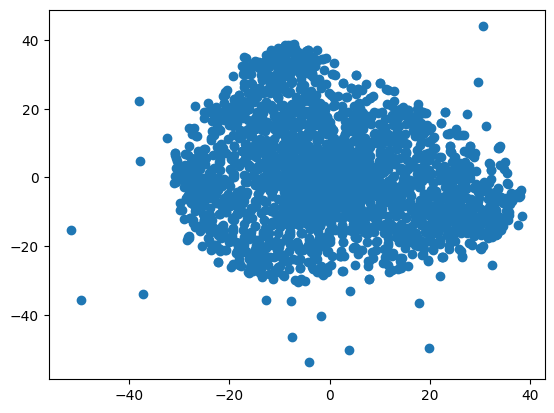

In [31]:
tsne = TSNE()
d = tsne.fit_transform(np.array(preds))
plt.scatter(d[:, 0], d[:, 1])
plt.show()

In [32]:
a_embs = ds.get_embs_from_ids(initial.return_ids_of_objects(TYPE_AUDIO))
a_res = encode_tensors(model_audio, a_embs)
a_dict = {i: v for i, v in zip(initial.return_ids_of_objects(TYPE_AUDIO), a_res)}

100%|██████████| 22/22 [00:00<00:00, 284.77it/s]


In [33]:
ready = Ready_Embeddings_Dataset( # Связывание готовых эмбов и id
    texts=id_text,
    images=i_dict,
    audios=a_dict
)

---- SAMPLE 1 ----
yoga
--- SEARCH BY TEXT -> IMAGES ---


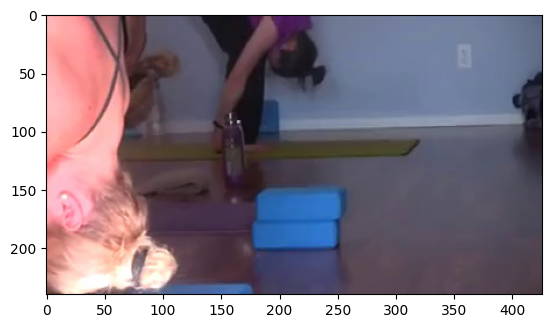

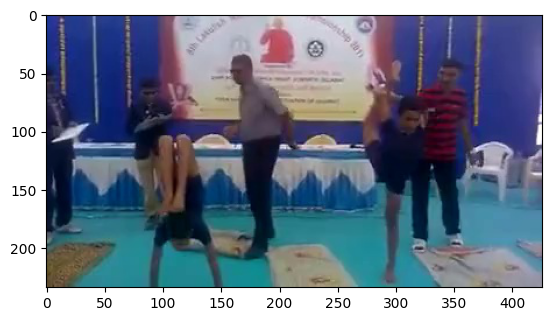

In [34]:
visual_validation(initial, ready, n_samples=1, n_neib=2, sby=TYPE_TEXT)

---- SAMPLE 1 ----


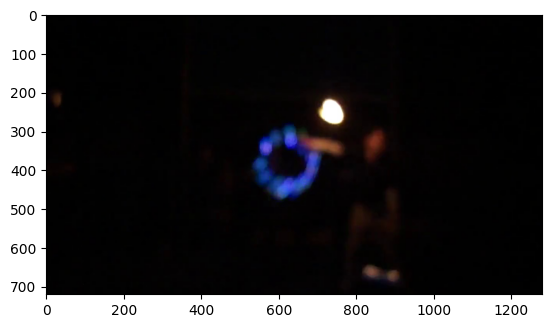

--- SEARCH BY IMAGE -> TEXTS ---
spinning poi


In [35]:
visual_validation(initial, ready, n_samples=1, n_neib=1, sby=TYPE_IMAGE)

---- SAMPLE 1 ----


--- SEARCH BY AUDIO -> IMAGE ---


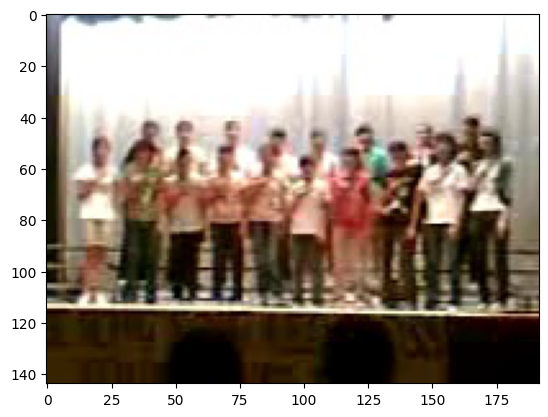

In [36]:
visual_validation(initial, ready, n_samples=1, n_neib=1, sby=TYPE_AUDIO)

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [47]:
x = []
y = []
idf = initial.return_id_df(TYPE_IMAGE).values
for xid, yid in idf:
    y.append(initial.get_object_by_global_id(yid).content)
    x.append(ready.get_image_emb_by_id(xid))
y = LabelEncoder().fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y)
mdl = LogisticRegression().fit(x_train, y_train)
mdl.score(x_test, y_test)

0.2785608308605341

In [39]:
x = []
y = []
idf = initial.return_id_df(TYPE_AUDIO).values
for xid, yid in idf:
    y.append(initial.get_object_by_global_id(yid).content)
    x.append(ready.get_audio_emb_by_id(xid))
y = LabelEncoder().fit_transform(y)
mdl = LogisticRegression().fit(x, y)
mdl.score(x, y)

0.27404247426504685